In [1]:
# Import all required modules
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/My Drive/finalProj/diabetes_prediction_dataset.csv")

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df.isnull().sum().sort_values(ascending=False) #gives the null value columns in decending order.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True) #drop the duplicates
df = df.dropna()
df.shape

(96146, 9)

In [10]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 10:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

gender
3 [('Female', 56161), ('Male', 39967), ('Other', 18)]
----------
age
102
----------
hypertension
2 [(0, 88685), (1, 7461)]
----------
heart_disease
2 [(0, 92223), (1, 3923)]
----------
smoking_history
6 [('No Info', 32887), ('current', 9197), ('ever', 3998), ('former', 9299), ('never', 34398), ('not current', 6367)]
----------
bmi
4247
----------
HbA1c_level
18
----------
blood_glucose_level
18
----------
diabetes
2 [(0, 87664), (1, 8482)]
----------


<Axes: title={'center': 'Smoking History Distribution'}, xlabel='smoking_history', ylabel='count'>

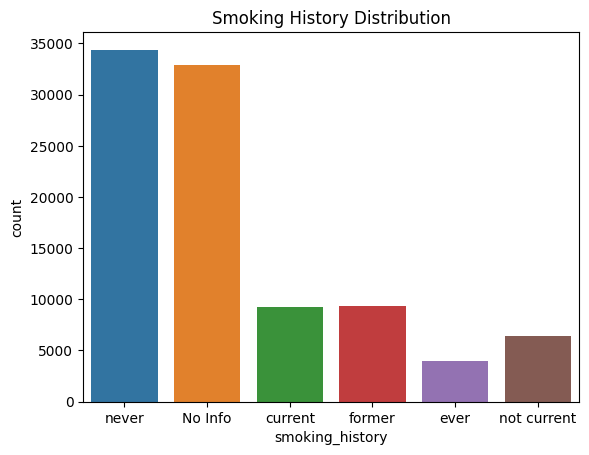

In [11]:
plt.title('Smoking History Distribution')
sns.countplot(data=df, x='smoking_history')

In [12]:
df = df[(df.smoking_history != "No Info")]

In [13]:
df['diabetes'].value_counts()

0    56222
1     7037
Name: diabetes, dtype: int64

<Axes: title={'center': 'Diabetes Distribution'}, xlabel='diabetes', ylabel='count'>

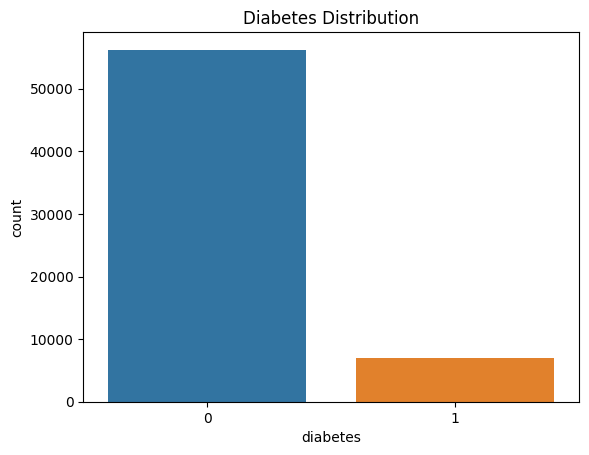

In [14]:
plt.title('Diabetes Distribution')
sns.countplot(data=df, x='diabetes')

<Axes: title={'center': 'Gender Distribution'}, xlabel='gender', ylabel='count'>

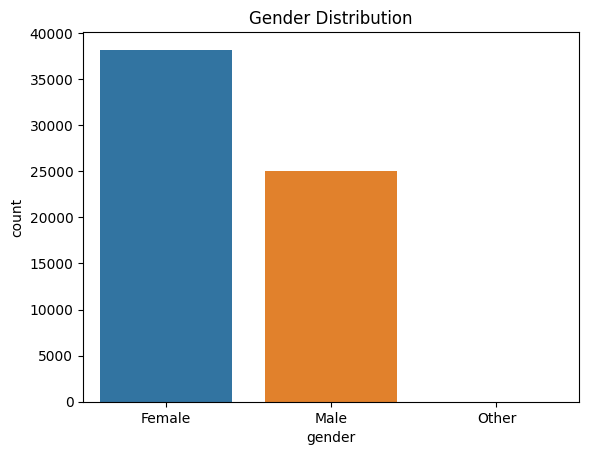

In [15]:
plt.title('Gender Distribution')
sns.countplot(data=df, x='gender')

<Axes: title={'center': 'Age Distribution'}, xlabel='age', ylabel='Count'>

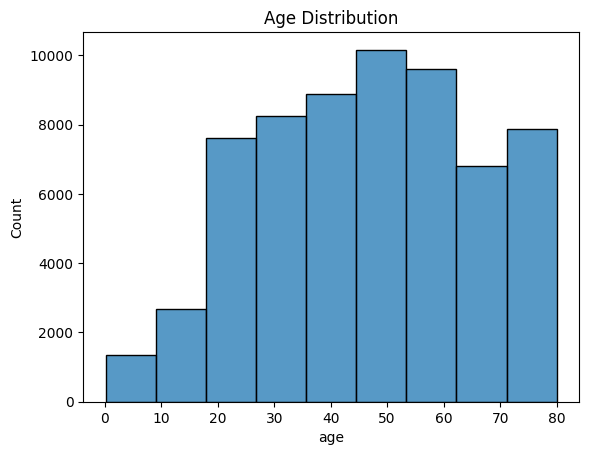

In [16]:
plt.title('Age Distribution')
sns.histplot(df['age'], bins=9)

<Axes: title={'center': 'Hypertension Distribution'}, xlabel='hypertension', ylabel='count'>

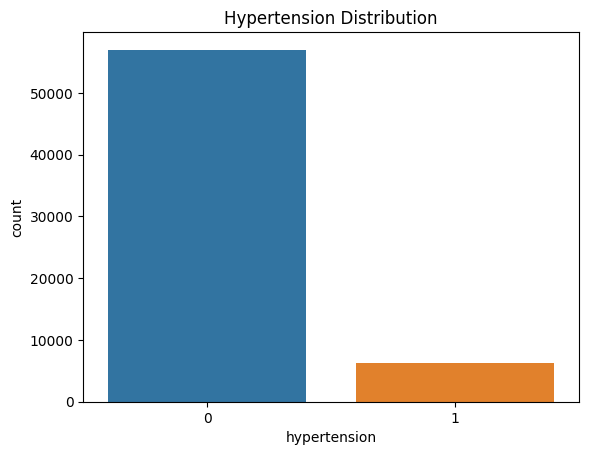

In [17]:
plt.title('Hypertension Distribution')
sns.countplot(data=df, x='hypertension')

<Axes: title={'center': 'Heart Disease Distribution'}, xlabel='heart_disease', ylabel='count'>

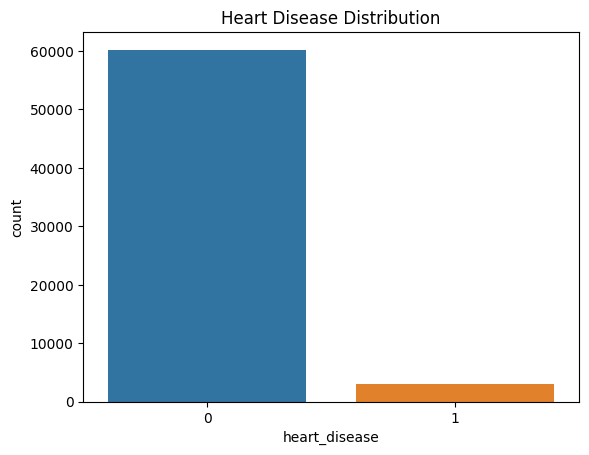

In [18]:
plt.title('Heart Disease Distribution')
sns.countplot(data=df, x='heart_disease')

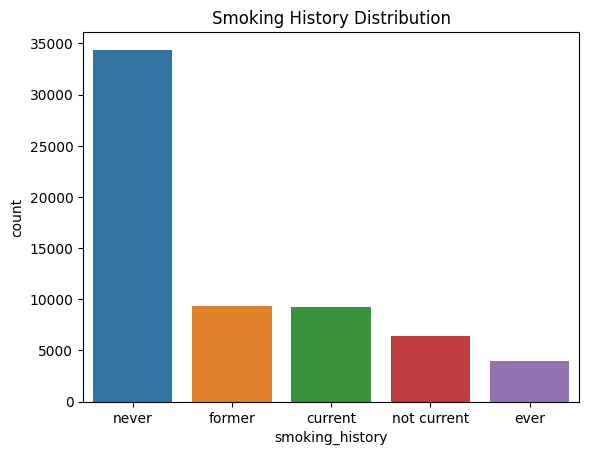

In [19]:
plt.title('Smoking History Distribution')
sns.countplot(data=df, x='smoking_history', order=df['smoking_history'].value_counts().index);

<Axes: title={'center': 'BMI Distribution'}, xlabel='bmi', ylabel='Count'>

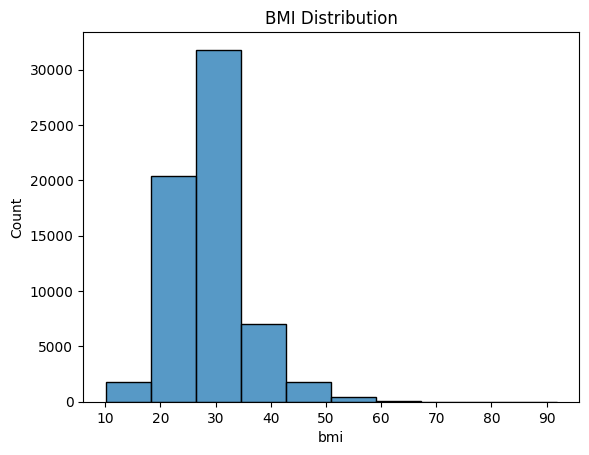

In [20]:
plt.title('BMI Distribution')
sns.histplot(df['bmi'], bins=10)

<Axes: title={'center': 'HbA1c Level Distribution'}, xlabel='HbA1c_level', ylabel='Count'>

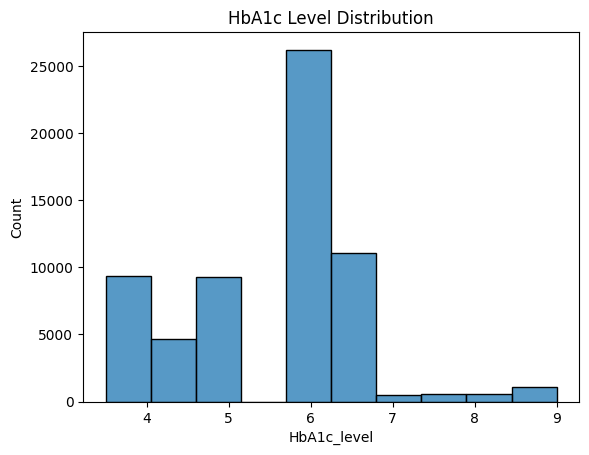

In [21]:
plt.title('HbA1c Level Distribution')
sns.histplot(df['HbA1c_level'], bins=10)

<Axes: title={'center': 'Blood Glucose Distribution'}, xlabel='blood_glucose_level', ylabel='Count'>

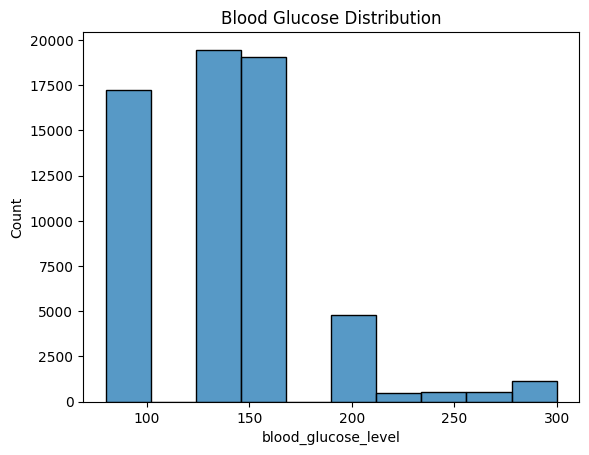

In [22]:
plt.title('Blood Glucose Distribution')
sns.histplot(df['blood_glucose_level'], bins=10)

<Axes: >

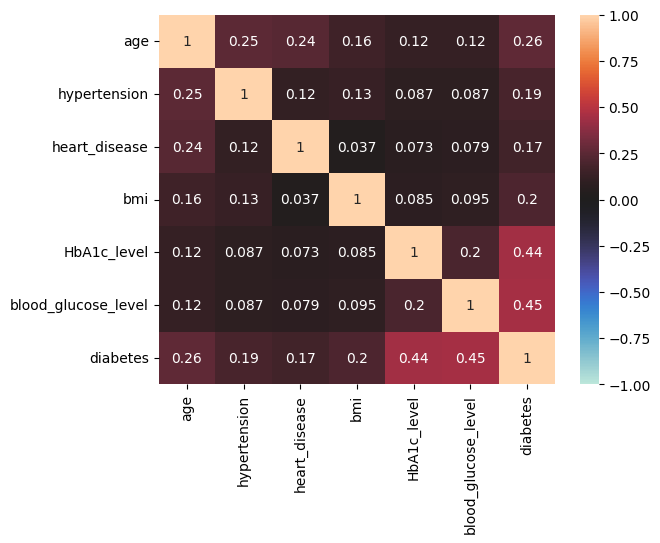

In [23]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)

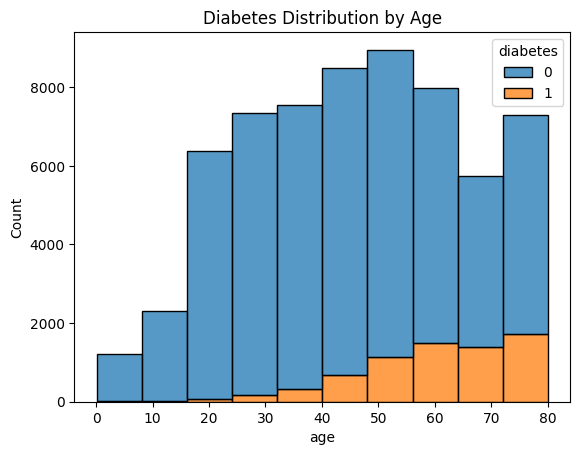

In [24]:
plt.title('Diabetes Distribution by Age')
sns.histplot(data=df, x='age', bins=10, hue='diabetes', multiple="stack");

<Axes: title={'center': 'Diabetes Distribution by Smoking History'}, xlabel='diabetes', ylabel='count'>

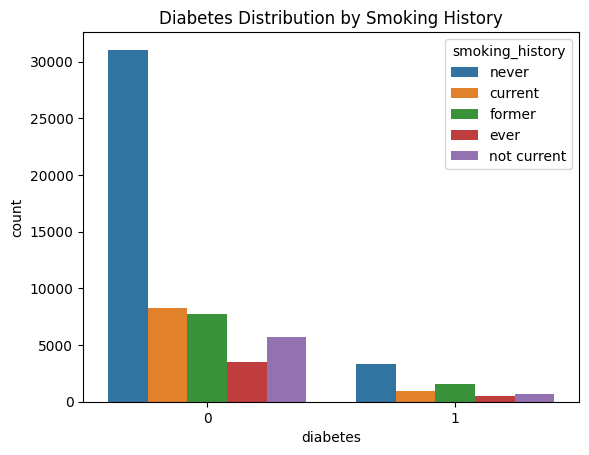

In [25]:
plt.title('Diabetes Distribution by Smoking History')
sns.countplot(data=df, x='diabetes', hue='smoking_history')

<Axes: title={'center': 'Diabetes Distribution by Gender'}, xlabel='diabetes', ylabel='count'>

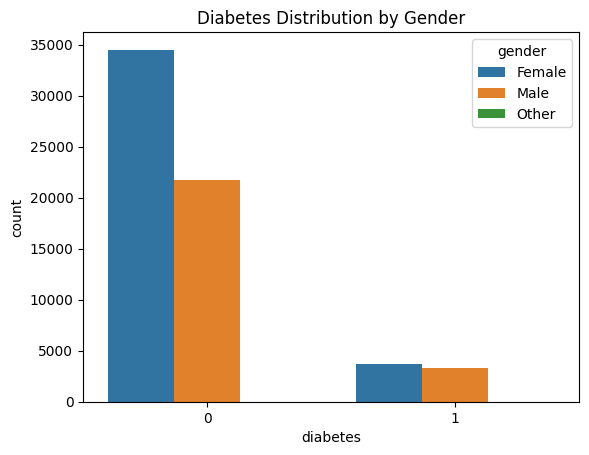

In [26]:
plt.title('Diabetes Distribution by Gender')
sns.countplot(data=df, x='diabetes', hue='gender')

In [27]:
df.sort_values(by=['bmi'],ascending = False).head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
69549,Male,38.0,0,0,never,91.82,6.0,160,0
96066,Male,80.0,0,0,never,88.76,6.2,140,0
4551,Female,45.0,0,0,never,88.72,7.0,300,1
24186,Male,49.0,0,0,former,83.74,6.8,155,1
71485,Female,48.0,0,0,never,81.73,6.5,130,1
58318,Female,36.0,0,0,never,79.46,6.2,220,1
54336,Female,25.0,0,0,current,75.78,6.1,100,0
20355,Female,55.0,0,0,former,73.77,6.6,160,0
28645,Female,42.0,0,0,never,72.89,6.8,280,1
21960,Male,47.0,0,0,never,72.28,4.5,90,0


### Features Engineering & Transformation

In [28]:
df['age'] = df['age'].astype(int)
df['blood_glucose_level'] = df['blood_glucose_level'].astype(int)

In [29]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
5,Female,20,0,0,never,27.32,6.6,85,0
6,Female,44,0,0,never,19.31,6.5,200,1
8,Male,42,0,0,never,33.64,4.8,145,0
9,Female,32,0,0,never,27.32,5.0,100,0
10,Female,53,0,0,never,27.32,6.1,85,0
11,Female,54,0,0,former,54.70,6.0,100,0


In [30]:
df = pd.get_dummies(df, columns=['smoking_history','gender'])
df.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80,0,1,25.19,6.6,140,0,0,0,0,1,0,1,0,0
2,28,0,0,27.32,5.7,158,0,0,0,0,1,0,0,1,0
3,36,0,0,23.45,5.0,155,0,1,0,0,0,0,1,0,0
4,76,1,1,20.14,4.8,155,0,1,0,0,0,0,0,1,0
5,20,0,0,27.32,6.6,85,0,0,0,0,1,0,1,0,0
6,44,0,0,19.31,6.5,200,1,0,0,0,1,0,1,0,0
8,42,0,0,33.64,4.8,145,0,0,0,0,1,0,0,1,0
9,32,0,0,27.32,5.0,100,0,0,0,0,1,0,1,0,0
10,53,0,0,27.32,6.1,85,0,0,0,0,1,0,1,0,0
11,54,0,0,54.70,6.0,100,0,0,0,1,0,0,1,0,0


In [31]:
# Create X and y dataframes
X = df.drop('diabetes', axis=1)
y = df['diabetes']
print(X.shape)
print(y.shape)

(63259, 14)
(63259,)


In [32]:
# Split into X/y Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

In [33]:
print(X_train.shape)
print(X_test.shape)

(44281, 14)
(18978, 14)


In [34]:
X_train.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
77695,47,0,0,27.32,5.7,130,0,0,0,1,0,1,0,0
31898,44,0,0,26.56,4.8,159,0,1,0,0,0,1,0,0
84439,44,1,0,28.16,7.5,220,0,0,0,1,0,1,0,0
76436,58,0,0,27.86,8.2,240,0,0,1,0,0,0,1,0
17771,41,0,0,24.53,6.1,200,0,0,0,1,0,0,1,0
95176,57,1,1,27.71,6.5,159,0,0,0,1,0,0,1,0
26321,80,0,0,31.28,4.0,155,0,0,1,0,0,0,1,0
26300,76,0,1,27.54,9.0,130,0,0,1,0,0,0,1,0
2954,57,0,0,31.68,5.7,160,0,0,1,0,0,0,1,0
82754,56,0,0,27.32,5.8,145,1,0,0,0,0,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

columns_to_scale = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']
X_train_to_scale = X_train[columns_to_scale]
X_train_scaled = scaler.fit_transform(X_train_to_scale)
df_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_scale)
X_train[columns_to_scale] = df_train_scaled[columns_to_scale].values

X_test_to_scale = X_test[columns_to_scale]
X_test_scaled = scaler.fit_transform(X_test_to_scale)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_scale)
X_test[columns_to_scale] = df_test_scaled[columns_to_scale].values

### Random Forest Model

In [36]:
rnd_clf = RandomForestClassifier(n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_prob = rnd_clf.predict_proba(X_test)
y_pred = rnd_clf.predict(X_test)

In [37]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[16781    89]
 [  647  1461]]


In [38]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.96      0.99      0.98     16870
    Diabetes       0.94      0.69      0.80      2108

    accuracy                           0.96     18978
   macro avg       0.95      0.84      0.89     18978
weighted avg       0.96      0.96      0.96     18978



In [39]:
print('roc_auc_score for Random Forest model is: ', roc_auc_score(y_test, y_pred))

roc_auc_score for Random Forest model is:  0.8438991832846109


In [40]:
importances = rnd_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Print the top 5 features
print("Top 5 Features:")
for i in range(5):
    print(f"{i+1}. {names[i]} ({importances[indices[i]]:.4f})")

Top 5 Features:
1. HbA1c_level (0.4012)
2. blood_glucose_level (0.3118)
3. bmi (0.1307)
4. age (0.1076)
5. hypertension (0.0172)


In [41]:
train_pred = rnd_clf.predict(X_train)
print("Confusion Matrix:\n", confusion_matrix(y_train, train_pred))
print("Classification Report:\n", classification_report(y_train, train_pred))

Confusion Matrix:
 [[39352     0]
 [   19  4910]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39352
           1       1.00      1.00      1.00      4929

    accuracy                           1.00     44281
   macro avg       1.00      1.00      1.00     44281
weighted avg       1.00      1.00      1.00     44281



### Random Forest Model (Regularized)

In [42]:
rnd_reg = RandomForestClassifier(n_jobs=-1, n_estimators=5, max_depth=2)
rnd_reg.fit(X_train, y_train)

y_pred_prob = rnd_reg.predict_proba(X_test)
y_pred = rnd_reg.predict(X_test)

In [43]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[16870     0]
 [ 1309   799]]


In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.93      1.00      0.96     16870
    Diabetes       1.00      0.38      0.55      2108

    accuracy                           0.93     18978
   macro avg       0.96      0.69      0.76     18978
weighted avg       0.94      0.93      0.92     18978



In [45]:
print('roc_auc_score for Random Forest model is: ', roc_auc_score(y_test, y_pred))

roc_auc_score for Random Forest model is:  0.689516129032258


In [46]:
importances = rnd_reg.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Print the top 5 features
print("Top 5 Features:")
for i in range(5):
    print(f"{i+1}. {names[i]} ({importances[indices[i]]:.4f})")

Top 5 Features:
1. blood_glucose_level (0.4623)
2. HbA1c_level (0.3182)
3. bmi (0.1792)
4. gender_Female (0.0144)
5. heart_disease (0.0106)


In [47]:
train_pred = rnd_reg.predict(X_train)
print("Confusion Matrix:\n", confusion_matrix(y_train, train_pred))
print("Classification Report:\n", classification_report(y_train, train_pred))

Confusion Matrix:
 [[39352     0]
 [ 3043  1886]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     39352
           1       1.00      0.38      0.55      4929

    accuracy                           0.93     44281
   macro avg       0.96      0.69      0.76     44281
weighted avg       0.94      0.93      0.92     44281



### Linear Kernel SVM

In [48]:
from sklearn.svm import SVC

param_grid = {'C': list(np.arange(0.01,5.2,0.5)), 'kernel': ['linear']}
grid_search = GridSearchCV(SVC(), param_grid = param_grid, cv=2, verbose = 0, n_jobs = -1)

In [49]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51,
                               4.01, 4.51, 5.01],
                         'kernel': ['linear']})

In [50]:
print('Best performing parameters are: ',grid_search.best_params_)
print('Best performing model is: ',grid_search.best_estimator_)

Best performing parameters are:  {'C': 2.01, 'kernel': 'linear'}
Best performing model is:  SVC(C=2.01, kernel='linear')


In [51]:
svmlin_pred = grid_search.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, svmlin_pred))

Confusion Matrix:
 [[16751   119]
 [  847  1261]]


In [52]:
print("Classification Report:\n", classification_report(y_test, svmlin_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     16870
           1       0.91      0.60      0.72      2108

    accuracy                           0.95     18978
   macro avg       0.93      0.80      0.85     18978
weighted avg       0.95      0.95      0.94     18978



In [53]:
svmlin_train_pred = grid_search.predict(X_train)
print("Confusion Matrix:\n", confusion_matrix(y_train, svmlin_train_pred))
print("Classification Report:\n", classification_report(y_train, svmlin_train_pred))

Confusion Matrix:
 [[39095   257]
 [ 1975  2954]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     39352
           1       0.92      0.60      0.73      4929

    accuracy                           0.95     44281
   macro avg       0.94      0.80      0.85     44281
weighted avg       0.95      0.95      0.94     44281



### Poly Kernel SVM

In [54]:
param_grid = {'C': list(np.arange(0.01,5.2,0.5)), 'degree': [2, 3],'kernel': ['poly']}
polysvm = GridSearchCV(SVC(), param_grid = param_grid, cv=2, verbose = 0, n_jobs = -1)

In [55]:
polysvm.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.51, 1.01, 1.51, 2.01, 2.51, 3.01, 3.51,
                               4.01, 4.51, 5.01],
                         'degree': [2, 3], 'kernel': ['poly']})

In [56]:
print('Best performing parameters are: ',polysvm.best_params_)
print('Best performing model is: ',polysvm.best_estimator_)

Best performing parameters are:  {'C': 5.01, 'degree': 3, 'kernel': 'poly'}
Best performing model is:  SVC(C=5.01, kernel='poly')


In [57]:
polysvm_pred = polysvm.predict(X_test)

In [58]:
print("Confusion Matrix:\n", confusion_matrix(y_test, polysvm_pred))

Confusion Matrix:
 [[16853    17]
 [  743  1365]]


In [59]:
print("Classification Report:\n", classification_report(y_test, polysvm_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     16870
           1       0.99      0.65      0.78      2108

    accuracy                           0.96     18978
   macro avg       0.97      0.82      0.88     18978
weighted avg       0.96      0.96      0.96     18978



In [60]:
svmpoly_train_pred = polysvm.predict(X_train)
print("Confusion Matrix:\n", confusion_matrix(y_train, svmpoly_train_pred))
print("Classification Report:\n", classification_report(y_train, svmpoly_train_pred))

Confusion Matrix:
 [[39329    23]
 [ 1779  3150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     39352
           1       0.99      0.64      0.78      4929

    accuracy                           0.96     44281
   macro avg       0.97      0.82      0.88     44281
weighted avg       0.96      0.96      0.96     44281



### RBF Kernel SVM

In [61]:
param_grid = {'C': list(np.arange(0.01,5.2,1)),'kernel': ['rbf']}
rbfsvm = GridSearchCV(SVC(), param_grid = param_grid, cv=2, verbose = 0, n_jobs = -1)

In [62]:
rbfsvm.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 1.01, 2.01, 3.01, 4.01, 5.01],
                         'kernel': ['rbf']})

In [63]:
print('Best performing parameters are: ',rbfsvm.best_params_)
print('Best performing model is: ',rbfsvm.best_estimator_)

Best performing parameters are:  {'C': 5.01, 'kernel': 'rbf'}
Best performing model is:  SVC(C=5.01)


In [64]:
rbfsvm_pred = rbfsvm.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, rbfsvm_pred))

Confusion Matrix:
 [[16845    25]
 [  772  1336]]


In [65]:
print("Classification Report:\n", classification_report(y_test, rbfsvm_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     16870
           1       0.98      0.63      0.77      2108

    accuracy                           0.96     18978
   macro avg       0.97      0.82      0.87     18978
weighted avg       0.96      0.96      0.95     18978



In [66]:
svmrbf_train_pred = rbfsvm.predict(X_train)
print("Confusion Matrix:\n", confusion_matrix(y_train, svmrbf_train_pred))
print("Classification Report:\n", classification_report(y_train, svmrbf_train_pred))

Confusion Matrix:
 [[39329    23]
 [ 1809  3120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     39352
           1       0.99      0.63      0.77      4929

    accuracy                           0.96     44281
   macro avg       0.97      0.82      0.88     44281
weighted avg       0.96      0.96      0.95     44281

